implementation of method described in 

Practice 2: Image processing with variational approaches Jean-François Aujol & Nicolas Papadakis

• Solving Tikhonov regularization with Fourrier Transform

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt

In [2]:
def rnrm_img(f):
    # returns renormed image
    return np.max(f)* (f -  np.min(f)) / (np.max(f) - np.min(f))

def tikhonov_den_fft(image, eps):
    # this function finds explicit solution of 
    # \lamda (u-f)-\Delta u = 0
    # DFT is used.
    F = np.fft.fft2(image)
    (n, m) = F.shape
    x = np.arange(0, m, 1)
    y = np.arange(0, n, 1)
    xx, yy = np.meshgrid(x, y, sparse=True)
    F_eps = eps * F / (eps + 4 * ( (np.sin(np.pi * xx/ m)**2 + (np.sin(np.pi * yy/ n)**2) )))
    minimzer = np.real(np.fft.ifft2(F_eps))
    return rnrm_img(minimzer)

<Figure size 576x576 with 0 Axes>

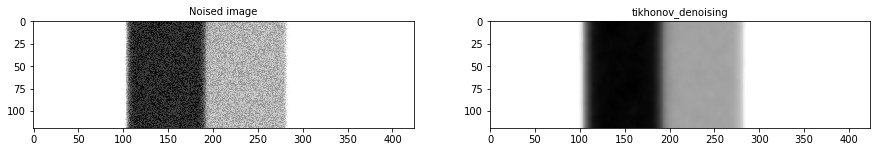

In [3]:
#download image
image = img.imread('test_1.png')
# Add noise to initial image 
image_noisy = rnrm_img(image+ np.sin(np.random.rand(image.shape[0],image.shape[1]))/3)
image_den = tikhonov_den_fft(image_noisy, 0.05)

fs = 10
plt.figure(figsize=(8,8))
f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].imshow(image_noisy, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[0].set_title('Noised image', fontsize=fs)
axarr[1].imshow(image_den, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[1].set_title('tikhonov_denoising', fontsize=fs)
plt.show()

<Figure size 576x576 with 0 Axes>

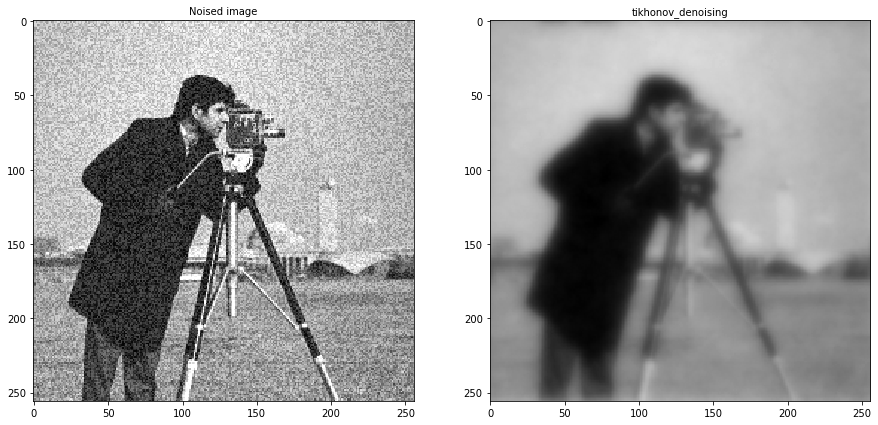

In [4]:
# Download image
image = img.imread('Cameraman.png')
# Add noise to initial image 
image_noisy = rnrm_img(image+ np.sin(np.random.rand(image.shape[0],image.shape[1]))/3)
image_den = tikhonov_den_fft(image_noisy, 0.05)

fs = 10
plt.figure(figsize=(8,8))
f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].imshow(image_noisy, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[0].set_title('Noised image', fontsize=fs)
axarr[1].imshow(image_den, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[1].set_title('tikhonov_denoising', fontsize=fs)
plt.show()